In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_df = pd.read_csv('Dojížďka_v_obcích_JMK___Mobility_within_the_South_Moravian_Region.csv') 

In [3]:
my_df.head(1)

,OID,Zdrojová_obec,Kód_zdrojové_obce,Start_X,Start_Y,Cílová_obec,Kód_cílové_obce,Cil_X,Cil_Y,Průměrný_počet_dojíždějících,Průměrný_počet_dojíždějících_v_,ORIG_FID,Shape__Length,Kód_cílové_obce_1
0,1,Petrov nad Desnou (Šumperk),500020.0,-556708.6186,-1074444.105,Brno (Brno-město),582786,-599411.9493,-1159315.158,1.7625,0.8905,0,95008.789542,NaN


In [4]:
# drop unnecesary columns
my_df = my_df.drop(["Start_X", "Start_Y","Cil_X" ,"Cil_Y", "ORIG_FID", "Shape__Length", "Kód_cílové_obce_1"], axis='columns')
my_df.head(1)

,OID,Zdrojová_obec,Kód_zdrojové_obce,Cílová_obec,Kód_cílové_obce,Průměrný_počet_dojíždějících,Průměrný_počet_dojíždějících_v_
0,1,Petrov nad Desnou (Šumperk),500020.0,Brno (Brno-město),582786,1.7625,0.8905


In [5]:
# group by and sum
df_2 = my_df.groupby('Cílová_obec')[['Průměrný_počet_dojíždějících', 'Průměrný_počet_dojíždějících_v_']].sum()
# create data frame again
df_2 = df_2.reset_index() 
# sort values
df_2.sort_values(by="Průměrný_počet_dojíždějících", ascending = False, inplace = True)
# rename columns
df_2.rename(columns={ 'Průměrný_počet_dojíždějících_v_':'Prum_dojizd_v_prac_dobe'}, inplace=True)
# count difference
df_2['dojizd_mimo_prac_dobu'] = df_2['Průměrný_počet_dojíždějících'] - df_2['Prum_dojizd_v_prac_dobe']

### Přidej počet obyvatel

In [6]:
# Počet obyvatel k 2024 (wikipedia)
my_dict = {"Prostějov (Prostějov)":43563, 
           "Uherské Hradiště (Uherské Hradiště)":24933,
           "Znojmo (Znojmo)":34160,
           "Kroměříž (Kroměříž)":28089,
           "Třebíč (Třebíč)":34797,
           "Žďár nad Sázavou (Žďár nad Sázavou)":20525,
           "Vyškov (Vyškov)":20498,
           "Hodonín (Hodonín)":23567}

In [7]:
# map "pocet obyvatel" to "city" 
df_2['Pocet_obyvatel'] = df_2['Cílová_obec'].map(my_dict)

In [8]:
# create "podil" ("kolik procent celkové dojížďky tvoří dojížďka v pracovní době")
df_2['podil (%)'] = ((df_2['Prum_dojizd_v_prac_dobe'] / df_2['Průměrný_počet_dojíždějících']) * 100).round(2)

In [9]:
# reorder df columns
new_column_order = ['Cílová_obec', 'Pocet_obyvatel', 'Průměrný_počet_dojíždějících', 'Prum_dojizd_v_prac_dobe', 'podil (%)']  # Define new order
df_2 = df_2[new_column_order]
df_2.head(15)

,Cílová_obec,Pocet_obyvatel,Průměrný_počet_dojíždějících,Prum_dojizd_v_prac_dobe,podil (%)
77,Brno (Brno-město),NaN,100541.1280,85032.2850,84.57
843,Prostějov (Prostějov),43563.0,11860.5725,9719.5125,81.95
1125,Uherské Hradiště (Uherské Hradiště),24933.0,11414.7790,9592.0660,84.03
1266,Znojmo (Znojmo),34160.0,9456.0380,7632.8440,80.72
448,Kroměříž (Kroměříž),28089.0,8295.9325,6967.7975,83.99
1120,Třebíč (Třebíč),34797.0,7675.6390,6367.4005,82.96
1380,Žďár nad Sázavou (Žďár nad Sázavou),20525.0,7161.3940,6194.0720,86.49
1215,Vyškov (Vyškov),20498.0,6737.0295,5717.6630,84.87
259,Hodonín (Hodonín),23567.0,6615.5855,5568.0235,84.17
619,Modřice (Brno-venkov),NaN,6305.3880,4987.3320,79.10


## small sample 
- "vezmi 9 vrchních a oddělej Brno" - tedy ti zbyde 8 obcí

In [10]:
# make sample df - pick some cyties
condition = (df_2["Průměrný_počet_dojíždějících"] > 6500) & (df_2["Průměrný_počet_dojíždějících"] < 20000)
sample_df = df_2[condition]
sample_df.set_index('Cílová_obec', inplace = True)
sample_df.head(12)

,Pocet_obyvatel,Průměrný_počet_dojíždějících,Prum_dojizd_v_prac_dobe,podil (%)
Cílová_obec,,,,
Prostějov (Prostějov),43563.0,11860.5725,9719.5125,81.95
Uherské Hradiště (Uherské Hradiště),24933.0,11414.7790,9592.0660,84.03
Znojmo (Znojmo),34160.0,9456.0380,7632.8440,80.72
Kroměříž (Kroměříž),28089.0,8295.9325,6967.7975,83.99
Třebíč (Třebíč),34797.0,7675.6390,6367.4005,82.96
Žďár nad Sázavou (Žďár nad Sázavou),20525.0,7161.3940,6194.0720,86.49
Vyškov (Vyškov),20498.0,6737.0295,5717.6630,84.87
Hodonín (Hodonín),23567.0,6615.5855,5568.0235,84.17


### Create plot

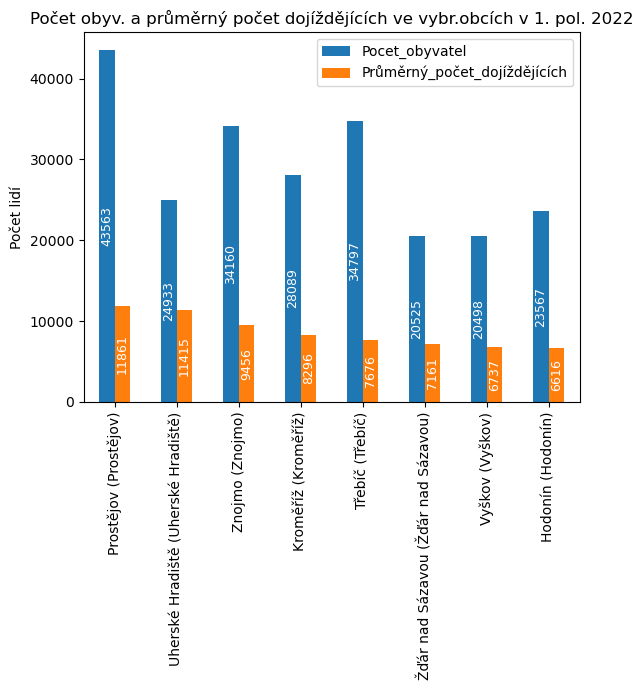

In [13]:
plot_df = sample_df[['Pocet_obyvatel','Průměrný_počet_dojíždějících']]
ax = plot_df.plot.bar()

ax.set_xlabel('') 
ax.set_ylabel('Počet lidí')
plt.title('Počet obyv. a průměrný počet dojíždějících ve vybr.obcích v 1. pol. 2022')

# insert numbers in bars
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + height / 2,
            f'{height:.0f}', ha='center', va='center', fontsize=9, color='white', rotation=90)

plt.show()